Yelp NLP project 

Part One of Four

Raymond Leong
________________________

# Goal of the project and Introduction to NLP

The goal of this project is to look through the yelp dataset to analyze reviews left by users on establishments so that businesses can obtain better ratings within their industry. There is a rich resource of words associated reviews and tips left on yelp's database and can be accessed through natural language processing: to look at the sentiment or getting the nouns, adjectives etc. Natural language processing allows computers to understand words and their attributes and then gives us important features of said word. 

Our stakeholders, as the data shows to benefit, will be people who have current establishments in PA in the food industry and who want to know the business problem: given two choices (service or food quality), which is the better option to invest in first?

NLP can accomplish this.

- For starters we can have positive and negative words given the context of a certain sentance. if the cumulative positive cosine similiarity scores for "server" is higher than "food" then we might provide some evidence for social features such as: attitutes of staff, staff morale, mandated clothing types. On the otherhand if words such as ["poor", "disgusting", "garbage"] are associated with food, then it might be imperative to invest in food quality.

We can also have relationships between words:

- For instance if the word "great" is correlated to a certain brand of cola, then we might be inclined to say that in a service industry- to stock more of that certain brand over others. Likewise, if it is correlated negatively then we would want to stock less of that brand. 

In these notebooks we will look at the following approach towards this large dataset in order to find the relationship between words and try to narrow down our findings to assist in a certain type of business.


- Notebook 1(EDA and FE): This notebook will focus on data exploration and finding a suitable business type we can explore (hotels, supermarkets, restaurants) that we can help investors, we open the possibility of trends of hours open, distance to nearest average distance to anywhere we like(through geojson). These feature variables can be included into a final model in which we measure the accuracy of the words and their relationship with stars. This relationship with stars of a resturant opens up possibilities to explore nouns associated with certain establishments. Stars, as you would assume is our output variable, we will explore the common ground 

* The following tasks needs to be accomplished in this notebook

1. we want to load in the file with a function 
2. We want to clean the data (although we will clean it again in notebook2) in order to find the most suitable businesses (in this case its restaurants)
3. Find the best output variable
4. Find the best resource for words, tips dataset or full review
5. Sentiment analysis 
6. Word clouds and EDA modeling 
7. Level ups including Geojson and collaborative filtering


- Notebook 2(Business problem identification and FE): This notebook can be accessed here: https://github.com/RaymondLeong94/Flatiron_Capstone_Project-/blob/main/Notebook%202%20EDA_Entity%20Extraction_other%20FE.ipynb
This notebook will focus on finding the PA resturants and develop our business problem further through data cleanring (of attributes and hours) entity extraction of nouns and adjectives, vader sentiment, distance calculation between establishments, distance measurement between words, modeling with the best model in notebook 1

- Notebook 3(Modeling): This notebook can be accessed here: https://github.com/RaymondLeong94/Flatiron_Capstone_Project-/blob/main/Notebook%203%20Model%20and%20results.ipynb. In this notebook we explore the ideal cutoff star score for a business and explore a new NN model.

- Final notebook: Everything will be summarized into a final word embedded NN model drawing resources from previous notebooks.
_________________________________

Loading in data:
We load in the data and make sure that each time the data gets loaded, it gets loaded in the same way each time.

To do this we would make the following test: use a function and set the amount of rows displayed the same file but with different row counts. Then merge the two and see how many they have in common

In [55]:
#import your libraries 
import json
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 10000)

#open the output file and set the encoding to utf 8
ifile = open('yelp_academic_dataset_review-001.json', encoding = 'utf-8') 

#due to limitations in hardware, set stop to a # to deliver the amount of rows you want 
stop = 200000

#the following function was from: 
#https://thedatafrog.com/en/articles/text-mining-pandas-yelp/
#author: colin
#publisher: The dataFrog

#set a list

all_data = list()

#given the file name for yelp (ifile), this function will take each line by line,
#assign a unique index value for each line and store it as a list to all_data 
for i, line in enumerate(ifile):
#if i can be divided by 10,000- then a 10000 lines has been processed until the int for stop has occured 
    if i%10000==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    text = data['text']
    stars = data['stars']
    user_id = data['user_id']
    business_id= data["business_id"]
    # add to the data collected so far
    all_data.append([stars, text, user_id, business_id])
# create the DataFrame
yelp_reviews = pd.DataFrame(all_data, columns=['stars','text', 'user_id', 'buisness_id'])



0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000


In [56]:
#drop duplicates
yelp_reviews['text'] = yelp_reviews['text'].drop_duplicates()

In [57]:
#100,000 rows, same file
import json
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 10000)

#open the output file and set the encoding to utf 9
ifile = open('yelp_academic_dataset_review-001.json', encoding = 'utf-8') 

#due to limitations in hardware, set stop to a # to deliver the amount of rows you want 
stop = 100000

#the following function was from: 
#https://thedatafrog.com/en/articles/text-mining-pandas-yelp/
#author: colin
#publisher: The dataFrog

#set a list 

all_data = list()

#given the file name for yelp (ifile), this function will take each line by line,
#assign a unique index value for each line and store it as a list to all_data 
for i, line in enumerate(ifile):
#if i can be divided by 10,000- then a 10000 lines has been processed until the int for stop has occured 
    if i%10000==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    text = data['text']
    stars = data['stars']
    user_id = data['user_id']
    business_id= data["business_id"]
    # add to the data collected so far
    all_data.append([stars, text, user_id, business_id])
# create the DataFrame
yelp_reviews2 = pd.DataFrame(all_data, columns=['stars','text', 'user_id', 'buisness_id'])



0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


In [58]:
yelp_reviews2['text'] = yelp_reviews2['text'].drop_duplicates()

test to see if the function works 

In [59]:
#do a inner merge on text to see how much yelp reviews2 appears in yelp_reviews
test = pd.merge(yelp_reviews2, yelp_reviews, how='inner', on=['text'])

In [60]:
test.shape

(106588, 7)

So out of 100,000 columns 6588 appear which is a 6.5% error rate we will want to account for when running this our exams

<AxesSubplot:>

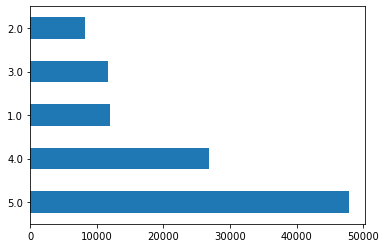

In [61]:
#We need to look at the distributions between is open and stars because the output variable will differ depending on which we're using, tips or full review
import matplotlib as plot
test.stars_x.value_counts().plot(kind='barh')

This is a good chart showing the distributions of stars, its mostly 5 stars. We now want to know how many unique businsses there are in our dataset

In [62]:
#load in business data
buisness_data = pd.read_json('yelp_academic_dataset_business.json', lines =True)

In [63]:
#there are 150,000 unique busineses 
#please refer to the documentation at:https://www.yelp.com/dataset/documentation/main 
buisness_data.shape


(150346, 14)

There are 150346 unique businesses with some possible duplicates but now we can explore a fundamental problem in the dataset: which is more representative of a positive feature? Reviews or Tips?


These variants in two different dataframes with two different outputs. Reviews only has the outputs for stars, tips only has the output as status of restaurant.

In [64]:
#load in business dataframe columns that are relevant 
#author: unknown 
buisness_data_for_NLTK= pd.DataFrame().assign(business_id =buisness_data["business_id"], name=buisness_data["name"], is_open=buisness_data["is_open"])
buisness_data_for_NLTK = buisness_data_for_NLTK.drop_duplicates()

In [65]:
#take the tips dataframe and we're running 200,000 lines like we did in yelp review
ifile = open('yelp_academic_dataset_tip.json', encoding = 'utf-8') 

# read the first 100k entries
# set to -1 to process everything
stop = 200000

all_data = list()
for i, line in enumerate(ifile):
    if i%10000==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    user_id= data["user_id"]
    business_id = data["business_id"]
    text = data["text"]
    
    # add to the data collected so far
    all_data.append([user_id, business_id, text])
# create the DataFrame
tips= pd.DataFrame(all_data, columns=["user_id", "business_id", "text"])

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000


In [66]:
tips= tips.drop_duplicates()

In [67]:
#merge on business id 
import pandas as pd
comparing_tips_with_nltk = pd.merge(tips, buisness_data_for_NLTK, on='business_id')

In [68]:
#begin review merge 
import json
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 10000)

ifile = open('yelp_academic_dataset_review-001.json', encoding = 'utf-8') 

stop = 200000

all_data = list()

for i, line in enumerate(ifile):
    if i%10000==0:
        print(i)
    if i==stop:
        break    
    data = json.loads(line)
    
    
    stars = data['stars']
    
    business_id= data["business_id"]
    all_data.append([stars, business_id])
yelp_reviews = pd.DataFrame(all_data, columns=['stars', 'business_id'])


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000


In [69]:
yelp_reviews.business_id.nunique()

11451

Out of the 150,000 unique businesses availabe we only use 11451 unique buissness out of 200,000 rows. Theoretically we would need a (150,000/11451) 10x multiplier in our hardware to run the full file and extract every detail.

In [70]:
#https://stackoverflow.com/questions/39403705/mean-of-values-in-a-column-for-unique-values-in-another-column
#author marcus 
#we need to see the stars for each business and put them into our merge
yelp_reviews= yelp_reviews.groupby('business_id').mean().reset_index()

<AxesSubplot:ylabel='Density'>

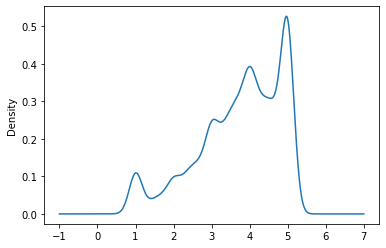

In [71]:
yelp_reviews['stars'].plot(kind= 'kde')

Another graph that illustrates the density distribution of stars

In [72]:
comparing_tips_with_nltk

,user_id,business_id,text,name,is_open
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,Century 20 El Con and XD,1
1,-PNOT-APcKKu9PFokhCtJA,3uLgwr0qeCNMjKenHJwPGQ,The Dark Knight Rises in XD! I don't know what...,Century 20 El Con and XD,1
2,wzX8UssOglKwSDx8qob8zA,3uLgwr0qeCNMjKenHJwPGQ,Cleanliness matters....I just sat down to watc...,Century 20 El Con and XD,1
3,bQmEEqlobO4J0oasLUTX0Q,3uLgwr0qeCNMjKenHJwPGQ,Early bird gets the worm!,Century 20 El Con and XD,1
4,u2NnaNOcwOVCWDYeGQpoaA,3uLgwr0qeCNMjKenHJwPGQ,Brand new seats!,Century 20 El Con and XD,1
...,...,...,...,...,...
199645,JTtbe6x7atUrllkFyIGV6g,WfgVvztkGkBppJOv0_UTsw,So worth it. Good food and you will leave full...,Two Sisters Kitchen,0
199646,4BdMzNZMM1EZtIvyt7jIZQ,QH1oFYDD2eOHVDRXN_fC5Q,They do great work which is why they are alway...,Annie Nail Salon,1
199647,RsV2qD4rmcW6izemjLWZAw,_u-qLVtE5TIR4z4q4rVEGQ,Very nice and reasonable,Nails First II,1
199648,034cPv7513J_15IdRT-HTw,v0O7QnfU6yaO3RFu6pkM5g,Know what you want before you come in because ...,Paperback Alley Used Books,1


In [73]:
#second merge is stars and we want to keep the unique values of the buisness id and put the stars next to them if they match 
comparing_tips_with_nltk2 = pd.merge(comparing_tips_with_nltk, yelp_reviews,  on='business_id', how = 'left' )
comparing_tips_with_nltk2


,user_id,business_id,text,name,is_open,stars
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,Century 20 El Con and XD,1,NaN
1,-PNOT-APcKKu9PFokhCtJA,3uLgwr0qeCNMjKenHJwPGQ,The Dark Knight Rises in XD! I don't know what...,Century 20 El Con and XD,1,NaN
2,wzX8UssOglKwSDx8qob8zA,3uLgwr0qeCNMjKenHJwPGQ,Cleanliness matters....I just sat down to watc...,Century 20 El Con and XD,1,NaN
3,bQmEEqlobO4J0oasLUTX0Q,3uLgwr0qeCNMjKenHJwPGQ,Early bird gets the worm!,Century 20 El Con and XD,1,NaN
4,u2NnaNOcwOVCWDYeGQpoaA,3uLgwr0qeCNMjKenHJwPGQ,Brand new seats!,Century 20 El Con and XD,1,NaN
...,...,...,...,...,...,...
199645,JTtbe6x7atUrllkFyIGV6g,WfgVvztkGkBppJOv0_UTsw,So worth it. Good food and you will leave full...,Two Sisters Kitchen,0,NaN
199646,4BdMzNZMM1EZtIvyt7jIZQ,QH1oFYDD2eOHVDRXN_fC5Q,They do great work which is why they are alway...,Annie Nail Salon,1,NaN
199647,RsV2qD4rmcW6izemjLWZAw,_u-qLVtE5TIR4z4q4rVEGQ,Very nice and reasonable,Nails First II,1,NaN
199648,034cPv7513J_15IdRT-HTw,v0O7QnfU6yaO3RFu6pkM5g,Know what you want before you come in because ...,Paperback Alley Used Books,1,NaN


In [74]:
comparing_tips_with_nltk2.stars.isna().sum()

175519

The overlapping restaurants that reviews and tips point at is very low (about 22131 (199650-17619)). At this point we need to strongly consider which form of text to use. 



Looking at tips

In [75]:
#lets look at what creates a successful buisness, what tips do we get?

comparing_tips_with_nltk.text= comparing_tips_with_nltk.text.convert_dtypes(str)
import re
import re
import nltk
from nltk import pos_tag#a must need in order for the rest of the packages to work 
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer #three different type of tokenizers that we may use 
from nltk.corpus import stopwords, wordnet# need
from nltk.stem import WordNetLemmatizer #need

In [76]:
comparing_tips_with_nltk

,user_id,business_id,text,name,is_open
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,Century 20 El Con and XD,1
1,-PNOT-APcKKu9PFokhCtJA,3uLgwr0qeCNMjKenHJwPGQ,The Dark Knight Rises in XD! I don't know what...,Century 20 El Con and XD,1
2,wzX8UssOglKwSDx8qob8zA,3uLgwr0qeCNMjKenHJwPGQ,Cleanliness matters....I just sat down to watc...,Century 20 El Con and XD,1
3,bQmEEqlobO4J0oasLUTX0Q,3uLgwr0qeCNMjKenHJwPGQ,Early bird gets the worm!,Century 20 El Con and XD,1
4,u2NnaNOcwOVCWDYeGQpoaA,3uLgwr0qeCNMjKenHJwPGQ,Brand new seats!,Century 20 El Con and XD,1
...,...,...,...,...,...
199645,JTtbe6x7atUrllkFyIGV6g,WfgVvztkGkBppJOv0_UTsw,So worth it. Good food and you will leave full...,Two Sisters Kitchen,0
199646,4BdMzNZMM1EZtIvyt7jIZQ,QH1oFYDD2eOHVDRXN_fC5Q,They do great work which is why they are alway...,Annie Nail Salon,1
199647,RsV2qD4rmcW6izemjLWZAw,_u-qLVtE5TIR4z4q4rVEGQ,Very nice and reasonable,Nails First II,1
199648,034cPv7513J_15IdRT-HTw,v0O7QnfU6yaO3RFu6pkM5g,Know what you want before you come in because ...,Paperback Alley Used Books,1


In [77]:
#https://github.com/sharmaroshan/Twitter-Sentiment-Analysis/blob/master/LICENSE
#under license provided, this code was supplied by the NLTK library and github owner above
#adjustments made by me are highlighted. 

sw = stopwords.words('english')
sw.extend(['link', 'rt',])
#added all punctuation, made sure # and @ wasnt in there
punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~“!'
twitter_re = re.compile('[#@][a-zA-Z]*')
num_re = re.compile('^\d{1}$')
hashtags = re.compile ("#([a-zA-Z0-9_]{1,50})")

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def txt_clean(txt, stop_words=sw):
    # takes in a string and returns a cleaned up string ready for count or tfidf vectorizing
    
    # splitting the text up into words
    t = txt.split(' ')
    # turning the words lowercase
    t = [w.lower() for w in t]
    # removing punctuation
    t = [w.translate(w.maketrans('','', punctuation)) for w in t]
    # removing @'s and #'s which are twitter jargon
    t = [w for w in t if not twitter_re.match(w)]
    t = [w for w in t if not hashtags.match(w)]

    # removing leftover numbers
    t = [w for w in t if not num_re.match(w)]
    # removing stop words and more twitter jargon
    t = [w for w in t if w not in stop_words]
    # removing empty strings
    t = [w for w in t if w]
    
    # word lemmatizing
    t = pos_tag(t)
    t = [(w[0], get_wordnet_pos(w[1])) for w in t]
    lem = WordNetLemmatizer()
    t = [lem.lemmatize(w[0], w[1]) for w in t]
    # joining all the strings together into one
    return ' '.join(t)

comparing_tips_with_nltk['text_refurbished'] = comparing_tips_with_nltk["text"].map(txt_clean)

In [78]:
#due to memory issues lets save this
comparing_tips_with_nltk.to_csv('comparing_tips_with_nltk.csv')

Getting kde to establish proper vader scores 

<AxesSubplot:ylabel='Density'>

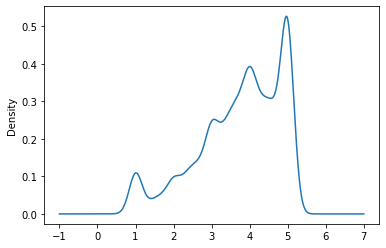

In [79]:
#looking at this chart we need to find the optimal density which is the median 
yelp_reviews['stars'].plot(kind= 'kde')

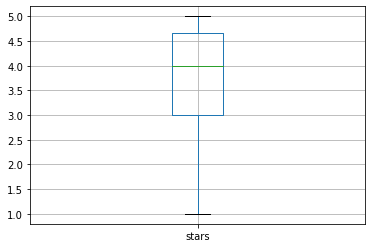

In [80]:
#using a boxplot to find the median
vader_analysis_yelp = yelp_reviews.boxplot(column = ['stars'])

Looking at the optimal resturants it would be between the 3 and 4.6 star category so this will be our reference point for vader sentiment analysis for the full review

.3 is 4.6 stars

.195 is around 3

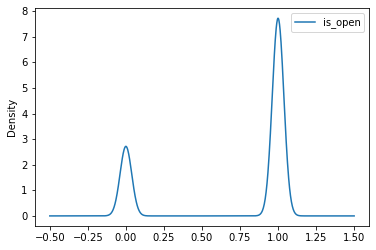

In [81]:
#we are using kde only for tips because boxplot shows us nothing. however we can see that ~75% of the data is open and around 25% of the data is closed
vader_analysis_tips = comparing_tips_with_nltk.plot(kind = 'kde')

Ideally we would want to use some statistical analysis to perhaps find some confidence intervals for these numbers, the particular range of sentiment analysis through vader where we might need to use open CV for an adaptive threshold. For our case we will use the default .1 and -.1


So in the reviews we have a distribution of .195 - .3 

In the tips we have a distribution of .25 - .75 


In [82]:
#get vader sentiment analysis going to cross compare 
#i would have liked to use adaptive thresholding 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence):

    #The sentimentintensity analyzer classifier is used to rate the polarity of the sentance from highly negative to highly positive

    sid_obj = SentimentIntensityAnalyzer()
    #obtain sentance and find the score via the polarity_score fx 
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    #if compound = 0 then it is neutral, -1 = negative, + 1 positive. the value we assign to compound/positive/negative is beyond the scope of this project.
    #if rated at least 5% positive then it is positive and the same for negative, anywhere in between and it's neutral.

    if sentiment_dict['compound'] >= 0.1 :
        return "Positive"
 
    elif sentiment_dict['compound'] <= -0.1 :
        return "Negative"
 
    else :
        return "Neutral"

In [83]:
#return vader through refurbished text
comparing_tips_with_nltk['text_refurbished'] = comparing_tips_with_nltk['text_refurbished'].convert_dtypes(str)
comparing_tips_with_nltk['vader_score'] = comparing_tips_with_nltk['text_refurbished'].map(sentiment_scores)

In [84]:
#save
comparing_tips_with_nltk.to_csv('comparing_tips_with_nltkvader.csv')

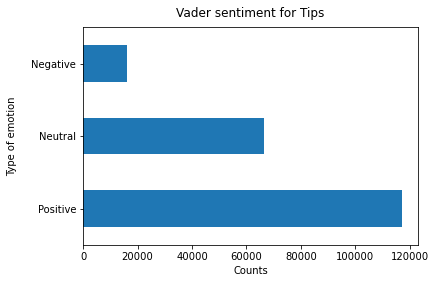

In [85]:
#plot the bar graph of the vader sentiment scores for tips
comparing_tips_with_nltk['vader_score'].value_counts().plot(kind = 'barh')
plt.xlabel("Counts")
plt.ylabel("Type of emotion", labelpad=14)
plt.title("Vader sentiment for Tips", y=1.02);

This distribution shows a moderate amount of neutral tips

In [86]:
#reload yelp reviews, its the same code as line 1,
import json
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 10000)

#open the output file and set the encoding to utf 8
ifile = open('yelp_academic_dataset_review-001.json', encoding = 'utf-8') 

#due to limitations in hardware, set stop to a # to deliver the amount of rows you want 
stop = 200000

all_data = list()

#given the file name for yelp (ifile), this function will take each line by line,
#assign a unique index value for each line and store it as a list to all_data 
for i, line in enumerate(ifile):
#if i can be divided by 10,000- then a 10000 lines has been processed until the int for stop has occured 
    if i%10000==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    text = data['text']
    stars = data['stars']
    user_id = data['user_id']
    business_id= data["business_id"]
    # add to the data collected so far
    all_data.append([stars, text, user_id, business_id])
# create the DataFrame
yelp_reviews = pd.DataFrame(all_data, columns=['stars','text', 'user_id', 'buisness_id'])

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000


In [87]:
#map it so that you can get the cleaned version of the review
yelp_reviews['text_refurbished'] = yelp_reviews["text"].map(txt_clean)

In [88]:
#pass the same sentiment analysis function on this
yelp_reviews['review_vader_score'] = yelp_reviews["text_refurbished"].map(sentiment_scores)

In [89]:
#save
yelp_reviews2.to_csv('full_text_with_nltk_vader.csv')

In [90]:
yelp_reviews['review_vader_score'].value_counts()

Positive    179068
Negative     16508
Neutral       4424
Name: review_vader_score, dtype: int64

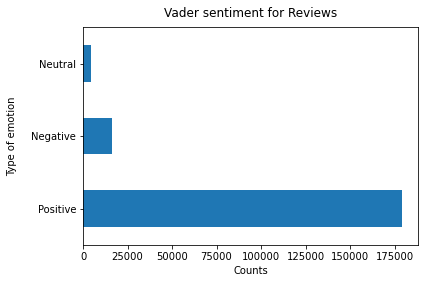

In [94]:
#plot the bar graph of the vader sentiment scores for tips
yelp_reviews['review_vader_score'].value_counts().plot(kind = 'barh')
plt.xlabel("Counts")
plt.ylabel("Type of emotion", labelpad=14)
plt.title("Vader sentiment for Reviews", y=1.02);

This is a much better bargraph compared to tips because it has very little neutrl reviews thus reducing the ambuguity behind the text. This means that overall our dataset for our business problem will be less ambugious and thus less bias.

Eda modeling for tips

Text(0.5, 1.02, 'Word analysis through Count Vectorization for Tips')

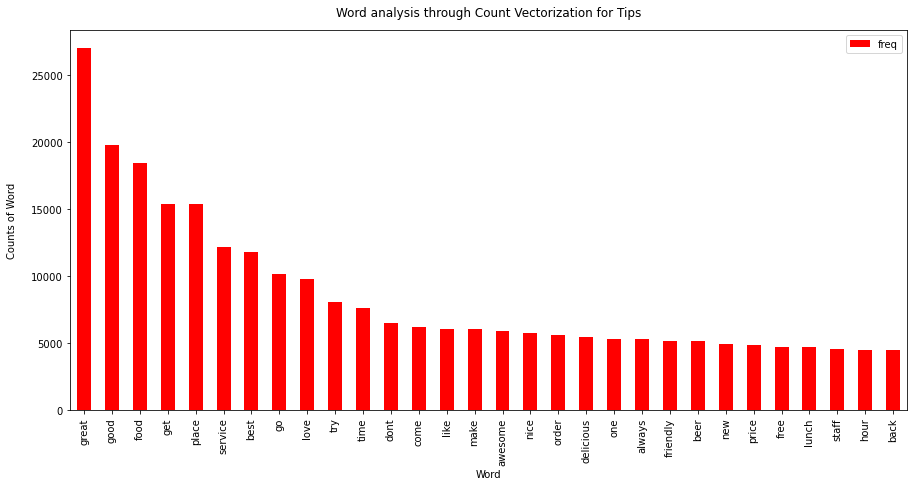

In [95]:
#this cell will return the top 30 words for TIPS
#code obtained and adjusted from flatiron
from sklearn.feature_extraction.text import CountVectorizer
#set X to encompass text refurbished
X = comparing_tips_with_nltk["text_refurbished"]


#use the CV classifier to pass the column without a tokenizer, preprocessor and set lowercase=False 
cv = CountVectorizer(tokenizer=None,
                             preprocessor=None,
                             lowercase=False)
#creates a sparse matrix
words = cv.fit_transform(X)
#add all the values into a variable called sum_words
sum_words = words.sum(axis=0)

#for every word in cv.vocabulary.items (which returns a list), add it to the unique count
#gives off a list of tuples' (item',count) that resembles a pd
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
#sort by ascending order
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#create the df
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.xlabel("Word")
plt.ylabel("Counts of Word", labelpad=14)
plt.title("Word analysis through Count Vectorization for Tips", y=1.02)


EDA modelling for reviews

Text(0.5, 1.02, 'Word analysis through Count Vectorization')

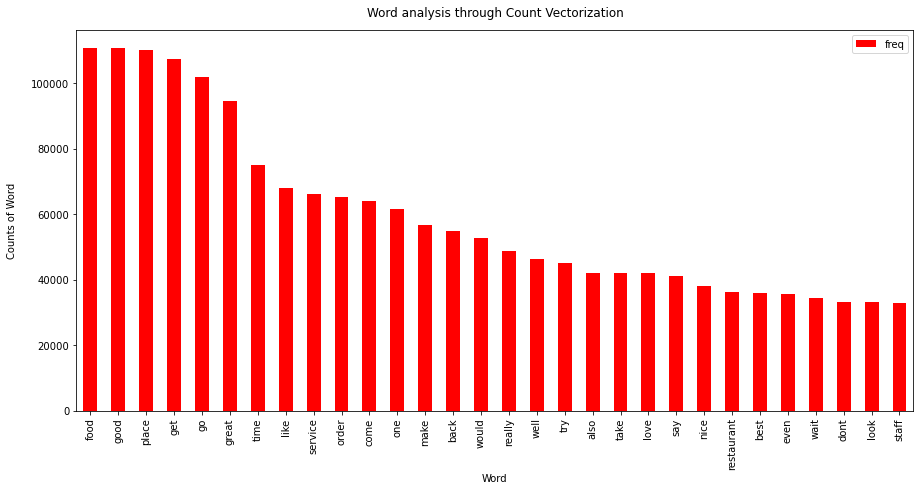

In [96]:
#this cell will return the top 30 words for reviews
from sklearn.feature_extraction.text import CountVectorizer
#set X to encompass all tweet_text 
X = yelp_reviews["text_refurbished"]


#use the CV classifier to pass the column without a tokenizer, preprocessor and set lowercase=False 
cv = CountVectorizer(tokenizer=None,
                             preprocessor=None,
                             lowercase=False)
#creates a sparse matrix
words = cv.fit_transform(X)
#add all the values into a variable called sum_words
sum_words = words.sum(axis=0)

#for every word in cv.vocabulary.items (which returns a list), add it to the unique count
#gives off a list of tuples' (item',count) that resembles a pd
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
#sort by ascending order
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#create the df
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
#use iloc next time
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.xlabel("Word")
plt.ylabel("Counts of Word", labelpad=14)
plt.title("Word analysis through Count Vectorization", y=1.02)

Looking at both tips and reviews I think it is evident that our Business problem can be involved in food and service and hospitality. As the most common words relate to that industry.

Word clouds

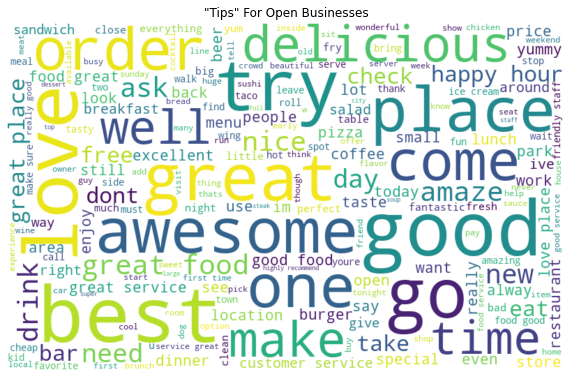

In [97]:
#a word cloud for words associated with an open business using tips 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from wordcloud import WordCloud
a =' '.join([text for text in comparing_tips_with_nltk['text_refurbished'] [comparing_tips_with_nltk['is_open'] == 1]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(a)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('"Tips" For Open Businesses')
plt.show()


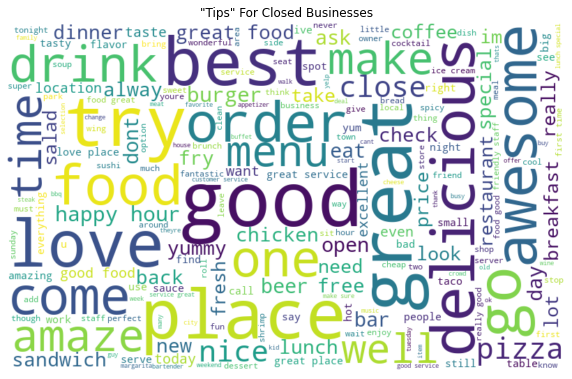

In [98]:
#a word cloud for closed businesses 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from wordcloud import WordCloud
b =' '.join([text for text in comparing_tips_with_nltk['text_refurbished'] [comparing_tips_with_nltk['is_open'] == 0]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(b)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('"Tips" For Closed Businesses')
plt.show()


Lets explore and compare models between is open and stars as output variables

In [99]:
#using tts 
from sklearn.model_selection import train_test_split
X= None
y = None 
X= yelp_reviews['text_refurbished']
y= comparing_tips_with_nltk['is_open']
X_t, X_val, y_t, y_val = train_test_split(X, y,
                                          test_size=0.25, random_state=42)

In [100]:
# tuse tfidf vec with ngram rangefrom 1 to 2
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(ngram_range=(1,2))
X_t = v.fit_transform(X_t)
X_val = v.transform(X_val)

In [101]:
v.vocabulary_

{'get': 187265,
 'workout': 488174,
 'hot': 218829,
 'get workout': 190277,
 'workout hot': 488216,
 'business': 71846,
 'lunch': 264008,
 'business lunch': 72023,
 'different': 128899,
 'room': 368774,
 'there': 439174,
 'something': 404108,
 'everyone': 154655,
 'good': 195504,
 'guest': 205123,
 'town': 451356,
 'want': 473332,
 'go': 192901,
 'cover': 111182,
 'weekend': 478657,
 'different room': 129102,
 'room there': 369234,
 'there something': 439410,
 'something everyone': 404209,
 'everyone good': 154730,
 'good guest': 196336,
 'guest town': 205207,
 'town want': 451686,
 'want go': 473619,
 'go cover': 193411,
 'cover weekend': 111347,
 'treat': 452976,
 'local': 255957,
 'homemade': 216664,
 'deliver': 125677,
 'fresh': 178341,
 'morning': 286192,
 'service': 387760,
 'smile': 401316,
 'treat local': 453088,
 'local homemade': 256171,
 'homemade deliver': 216706,
 'deliver fresh': 125730,
 'fresh morning': 178704,
 'morning service': 286420,
 'service smile': 388975,
 'chi

We get some nice vocab words here related to food

We now need to look at is_open to tips

In [102]:
#tfidf of tips as if they were documents

from sklearn.feature_extraction.text import TfidfVectorizer
X=None
y=None
X= comparing_tips_with_nltk['text_refurbished']
y= comparing_tips_with_nltk['is_open']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.25)



In [103]:
#tokenize the documents 
token_docs=[txt_clean(doc,sw) for doc in X_train]

In [104]:
#set up count vec
X_t, X_val, y_t, y_val = train_test_split(token_docs, y_train,
                                          test_size=0.25, random_state=42)

In [105]:
#code to get us vectorized forms of the words so that we can associate vectors with words 
#to use mnb or rf to predict 
cv = CountVectorizer()
X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)


X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

In [106]:
#used for metrics
from collections import defaultdict
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [107]:
#use mnb
mnb = MultinomialNB()
mnb.fit(X_t_vec, y_t)

MultinomialNB()

In [108]:
#accuracy
y_hat = mnb.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.7330840122879658

In [109]:
precision_score(y_val, y_hat, average='weighted')

0.6615328266054884

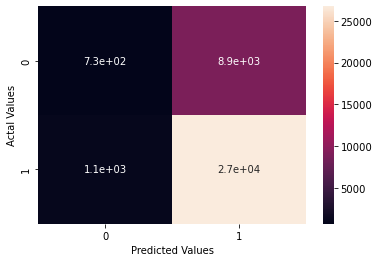

In [110]:
cm = confusion_matrix(y_val, y_hat)
cm_df  =pd.DataFrame(cm, index=[0,1], columns = [0,1])
cm_df
import seaborn as sns
sns.heatmap(cm_df, annot=True)
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

73% with a 66 ROC

Lets use RF

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
X=None
y=None
X= comparing_tips_with_nltk['text_refurbished']
y= comparing_tips_with_nltk['is_open']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.25)


In [ ]:
#token_docs=[txt_clean(doc,sw) for doc in X_train]
#token docs already defined

In [113]:
X_t, X_val, y_t, y_val = train_test_split(token_docs, y_train,
                                          test_size=0.25, random_state=42)

In [114]:
cv = CountVectorizer()
X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)


X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

In [115]:
#rf classifier
rf = RandomForestClassifier()
rf.fit(X_t_vec, y_t)

RandomForestClassifier()

In [116]:
#predict
y_pred=rf.predict(X_val_vec)

In [117]:
#metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import f1_score
print(f1_score(y_val, y_pred, average='micro'))

0.7206891946039802


In [118]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5254093181360509

72% (f1)accuracy 52.5% roc_auc, not that great

We are going to take a tangent on looking at word clouds specific for resturants above a certain star (our threshold)

In [119]:
#normaalize so that the dictionary can be expanded into the dataframe 
business_eda = pd.read_json('yelp_academic_dataset_business.json', lines =True)
business_eda1 = pd.json_normalize(business_eda['attributes'])
buisness_eda3 = pd.json_normalize(business_eda['hours'])



In [120]:
business_eda1.shape

(150346, 39)

In [121]:
#conoc
business_eda_norm = pd.read_json('yelp_academic_dataset_business.json', lines =True)
business_eda_final= pd.concat([business_eda_norm, business_eda1], axis=1)

business_eda_final= pd.concat([business_eda_final, buisness_eda3], axis =1)

In [122]:
business_eda_final.shape

(150346, 60)

In [ ]:
yelp_reviews2['stars']= yelp_reviews2['stars'].astype(int)

In [ ]:
yelp_reviews2['stars'].isna().sum()

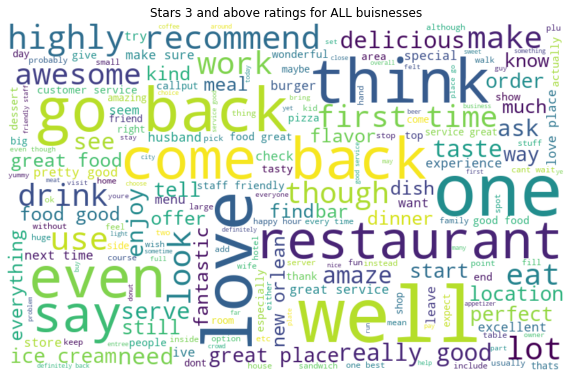

In [125]:
#word cloud for businesses stars 3 and above 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from wordcloud import WordCloud
stars3andabove =' '.join([text for text in yelp_reviews['text_refurbished'] [yelp_reviews['stars'] >= 3]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(stars3andabove)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Stars 3 and above ratings for ALL buisnesses')
plt.show()


Okay this is very good. we see that people that want to come back usually leave good reviews, however we need some more statistical analaysis on which words to focus.
There seems to be a lot more emotion when it comes to these positive reviews, but lets look at the negative ones 

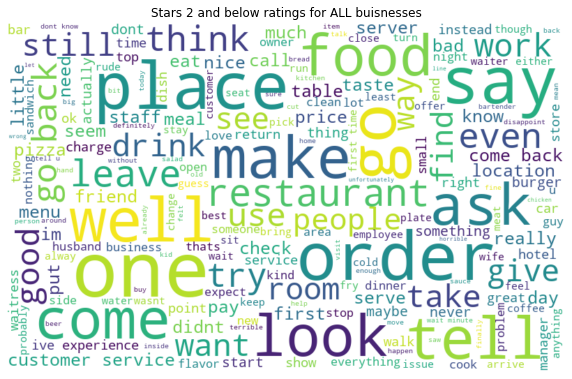

In [126]:
stars2andbelow =' '.join([text for text in yelp_reviews['text_refurbished'] [yelp_reviews['stars'] <= 2]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(stars2andbelow)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Stars 2 and below ratings for ALL buisnesses')
plt.show()

We are going to find the most establishments (states) for restaurants

In [133]:
business_eda = None
business_eda1 = None
buisness_eda3 = None 

In [134]:
#we will now expand and find the hours and attributes 
import pandas as pd
business_eda = pd.read_json('yelp_academic_dataset_business.json', lines =True)
business_eda1 = pd.json_normalize(business_eda['attributes'])
buisness_eda3 = pd.json_normalize(business_eda['hours'])

In [135]:
#merge # 1
result = pd.concat([business_eda, business_eda1], axis=1,)

In [136]:
#merge #2
business_data = pd.concat([result, buisness_eda3], axis =1)

In [137]:
business_data['categories'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150346 entries, 0 to 150345
Series name: categories
Non-Null Count   Dtype 
--------------   ----- 
150243 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [138]:
#expand categories, see final notebook for code explanation or project 1
business_data['categories']
business_data = business_data.drop('categories', axis=1).join(business_data['categories'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('establishment_type'))

In [139]:
#set to string because its an object
business_data['establishment_type'] = business_data['establishment_type'].astype('str')

In [140]:
#create 
list_establishments= business_data['establishment_type'].value_counts().index.tolist()


In [141]:
list_establishments

[' Restaurants',
 ' Food',
 ' Shopping',
 'Restaurants',
 ' Home Services',
 ' Nightlife',
 ' Beauty & Spas',
 ' Bars',
 ' Health & Medical',
 ' Local Services',
 ' Event Planning & Services',
 ' Automotive',
 'Food',
 ' Sandwiches',
 ' American (Traditional)',
 ' Active Life',
 'Shopping',
 ' Coffee & Tea',
 ' Breakfast & Brunch',
 ' Fast Food',
 ' Pizza',
 ' American (New)',
 ' Home & Garden',
 ' Fashion',
 ' Burgers',
 'Beauty & Spas',
 ' Hotels & Travel',
 ' Arts & Entertainment',
 ' Auto Repair',
 'Home Services',
 ' Hair Salons',
 ' Specialty Food',
 'Automotive',
 ' Italian',
 ' Mexican',
 ' Nail Salons',
 'Health & Medical',
 ' Doctors',
 ' Seafood',
 ' Hair Removal',
 ' Fitness & Instruction',
 'Local Services',
 ' Professional Services',
 ' Pets',
 ' Real Estate',
 ' Desserts',
 ' Salad',
 ' Bakeries',
 ' Wine & Spirits',
 ' Chicken Wings',
 ' Grocery',
 'Nightlife',
 ' Cafes',
 ' Caterers',
 ' Hotels',
 ' Venues & Event Spaces',
 ' Skin Care',
 ' Chinese',
 'Event Planning &

The food industry dominates this list

In [142]:
#establishments like resturants and food are worth analyzing 
#import re for regex
import re 

In [143]:
business_dataprep = business_data[business_data['establishment_type'].str.contains('.*Restaurants.*')| business_data['establishment_type'].str.contains('.*Food.*')]

In [144]:
buisness_data_prep = business_dataprep.drop_duplicates(subset=['business_id'], ignore_index= True)

In [145]:
buisness_data_prep

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,AgesAllowed,DietaryRestrictions,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,establishment_type
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0,Restaurants
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0,Food
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,NaN,NaN,0:0-0:0,6:0-22:0,6:0-22:0,6:0-22:0,9:0-0:0,9:0-22:0,8:0-22:0,Fast Food
3,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurants
4,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,...,NaN,NaN,0:0-0:0,6:0-21:0,6:0-21:0,6:0-16:0,6:0-16:0,6:0-17:0,6:0-21:0,Fast Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64611,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,...,NaN,NaN,0:0-0:0,0:0-17:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,Restaurants
64612,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,4.5,41,...,NaN,NaN,0:0-0:0,6:0-14:0,6:0-14:0,6:0-14:0,6:0-14:0,6:0-15:0,6:0-15:0,Specialty Food
64613,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,...,NaN,NaN,11:0-22:0,11:0-22:0,NaN,11:0-22:0,11:0-2:0,11:0-2:0,11:0-22:0,Restaurants
64614,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,19014,39.856185,-75.427725,4.5,14,...,NaN,NaN,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,Restaurants


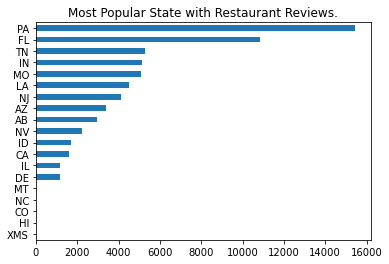

In [146]:
import matplotlib.pyplot as plt
ax = buisness_data_prep.state.value_counts(ascending=True).plot(kind = "barh")
ax = plt.title("Most Popular State with Restaurant Reviews.")
plt.show()


We will be looking at the PA restaurants first. The code below is to show our noramlized json

In [147]:
buisness_data_prep.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'hours', 'ByAppointmentOnly', 'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsPriceRange2', 'CoatCheck', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'Caters', 'WiFi', 'BusinessParking', 'WheelchairAccessible', 'HappyHour', 'OutdoorSeating', 'HasTV', 'RestaurantsReservations', 'DogsAllowed', 'Alcohol', 'GoodForKids', 'RestaurantsAttire', 'Ambience', 'RestaurantsTableService', 'RestaurantsGoodForGroups', 'DriveThru', 'NoiseLevel', 'GoodForMeal', 'BusinessAcceptsBitcoin', 'Smoking', 'Music', 'GoodForDancing', 'AcceptsInsurance', 'BestNights', 'BYOB', 'Corkage', 'BYOBCorkage', 'HairSpecializesIn', 'Open24Hours', 'RestaurantsCounterService', 'AgesAllowed', 'DietaryRestrictions', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'establishment_type'], dtype='object')

GeoJson file for distance

We can get our final PA restaurants using the following code but with a different dataframe. Through that we can draw calculate trends based on distance

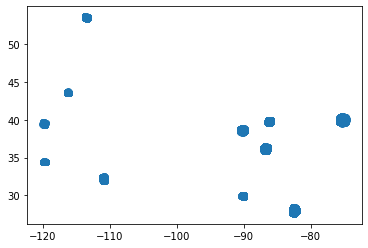

In [148]:
import matplotlib.pyplot as plt
plt.scatter(x=buisness_data_prep['longitude'], y=buisness_data_prep['latitude'])
plt.show()

Collaborative filtering for unsupervised learning for star aggregation

This is here to show that with an RMSE of 1.2 collaborative filtering using surprise and SVD is good enough for the majority of businesses. We can test this hypothesis in future notebooks

In [149]:
collabfilt= yelp_reviews[["stars", "user_id", "buisness_id"]]
collabfilt

,stars,user_id,buisness_id
0,3.0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw
1,5.0,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ
2,3.0,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A
3,5.0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA
4,4.0,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ
...,...,...,...
199995,5.0,uakTslg3Ay3C0816-5yNdQ,idf-eiurCrbsLRcH7c9zmw
199996,5.0,_fMw99otXOCu-Kzc-loMZA,v72HalBu5fQIFTD-oqhSgQ
199997,5.0,ZfG1T_noQnbOdXnz4USs0Q,cvHY1RTAPSoH94ysP2_eyQ
199998,5.0,I0MMq4iYjDjERnSjp76HDw,cBp1fn2LXpSHe4VbTXLYEw


In [152]:
#gets rid of copy warnings
pd.options.mode.chained_assignment = None

In [153]:
#surprise is used for this algo along encoding
from surprise import Reader, Dataset
from sklearn.preprocessing import LabelEncoder

#got to have both
encoder_business_id = LabelEncoder()
encoder_user_id = LabelEncoder()

# Fit the encoders on the business_id and user_id columns
collabfilt['business_id_encoded'] = encoder_business_id.fit_transform(collabfilt['buisness_id'])
collabfilt['user_id_encoded'] = encoder_user_id.fit_transform(collabfilt['user_id'])


In [155]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
# Create a reader object to read in the data
reader = Reader(rating_scale=(1, 5))

# Use the Dataset class from the surprise library to load the data
data = Dataset.load_from_df(collabfilt[['user_id_encoded', 'business_id_encoded', 'stars']], reader)

# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2)

# Create an instance of the SVD algorithm
algo = SVD()

# Train the model on the training data
algo.fit(train_data)

# Use the trained model to make predictions on the test data
predictions = algo.test(test_data)

# Compute the RMSE of the predictions
from surprise.accuracy import rmse
print(rmse(predictions))


RMSE: 1.2382
1.2381591678198152


In [156]:
bus_encodingdecoding = collabfilt[['business_id_encoded', 'buisness_id']]

In [157]:
bus_encodingdecoding = bus_encodingdecoding.reset_index()

In [158]:
bus_encodingdecoding = bus_encodingdecoding.drop(["buisness_id"], axis=1)

In [159]:
user_encodingdecoding = collabfilt[['user_id_encoded', 'user_id']]

In [160]:
#predictions is fine but making it back into a pd is difficult. we're using a different algo
import pandas as pd
predictions_df = pd.DataFrame(predictions, columns=['user_id', 'business_id', 'star', 'predicted_star', 'was_impossible'])

In [161]:
predictions_df = predictions_df.drop(columns="was_impossible")

In [162]:
#this is what each unique user would give a prediction and the actual star is there.
predictions_df

,user_id,business_id,star,predicted_star
0,128549,9970,5.0,4.104451
1,96148,336,5.0,4.113879
2,85981,1821,5.0,4.405460
3,93523,7815,5.0,3.890987
4,87204,9119,5.0,4.116074
...,...,...,...,...
39995,57595,7957,4.0,3.344169
39996,125462,3713,4.0,3.824656
39997,121407,1541,5.0,3.131692
39998,136772,8678,1.0,3.346521


# Conclusions for notebook


We will be using reviews instead of tips due to the lack of 'stars' assigned to the review. MNB seems to out perform RF but only by 1%

Vader sentiment analysis can be applied as a feature

Resturant-user rating can become another feature

GeoJSON can be used as another feature

We will be analyzing more in the final notebook: https://github.com/RaymondLeong94/Flatiron_Capstone_Project-/blob/main/Final_Notebook_collab.ipynb